# Математична статистика

## Завдання 1

> Візьми код симуляції із завдання 7 домашнього завдання до теми 7 “Теорія ймовірностей. Комбінаторика”
> Вважатимемо, що зміна ціни акцій у кожний момент часу дорівнює $ x \sim \Gamma(0.3, 1.1) $, де $ \Gamma $ — позначення гамма-розподілу.
> Необхідно запустити симуляцію $ n = 100 $ разів для різних значень часу $ t $.
> а) Побудуй гістограму розподілу $ x $.
> б) Запусти симуляцію з $ t $ від 1 до, наприклад, ~60 з кроком, наприклад, 1 або 2.
> Для кожного значення t побудуй гістограму розподілу ціни та перевір його на нормальність. Зроби висновки про зміну розподілу зі збільшенням t.

### Розв'язання

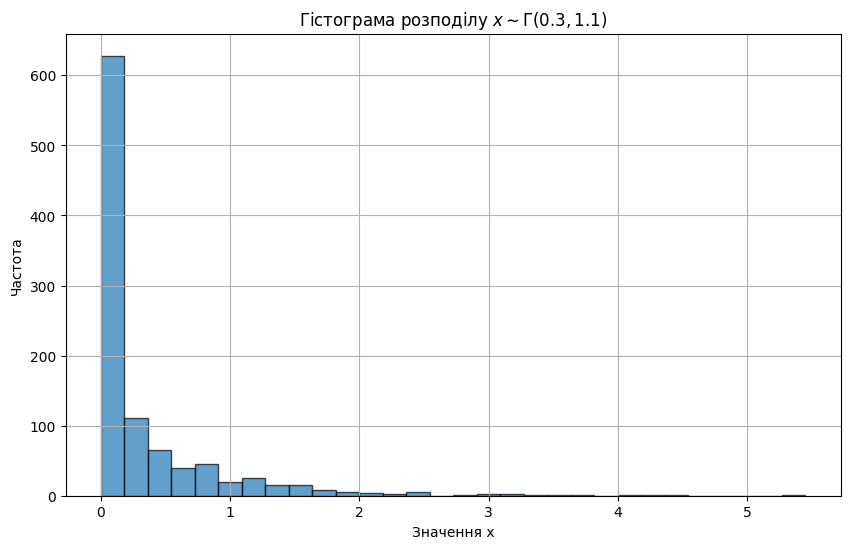

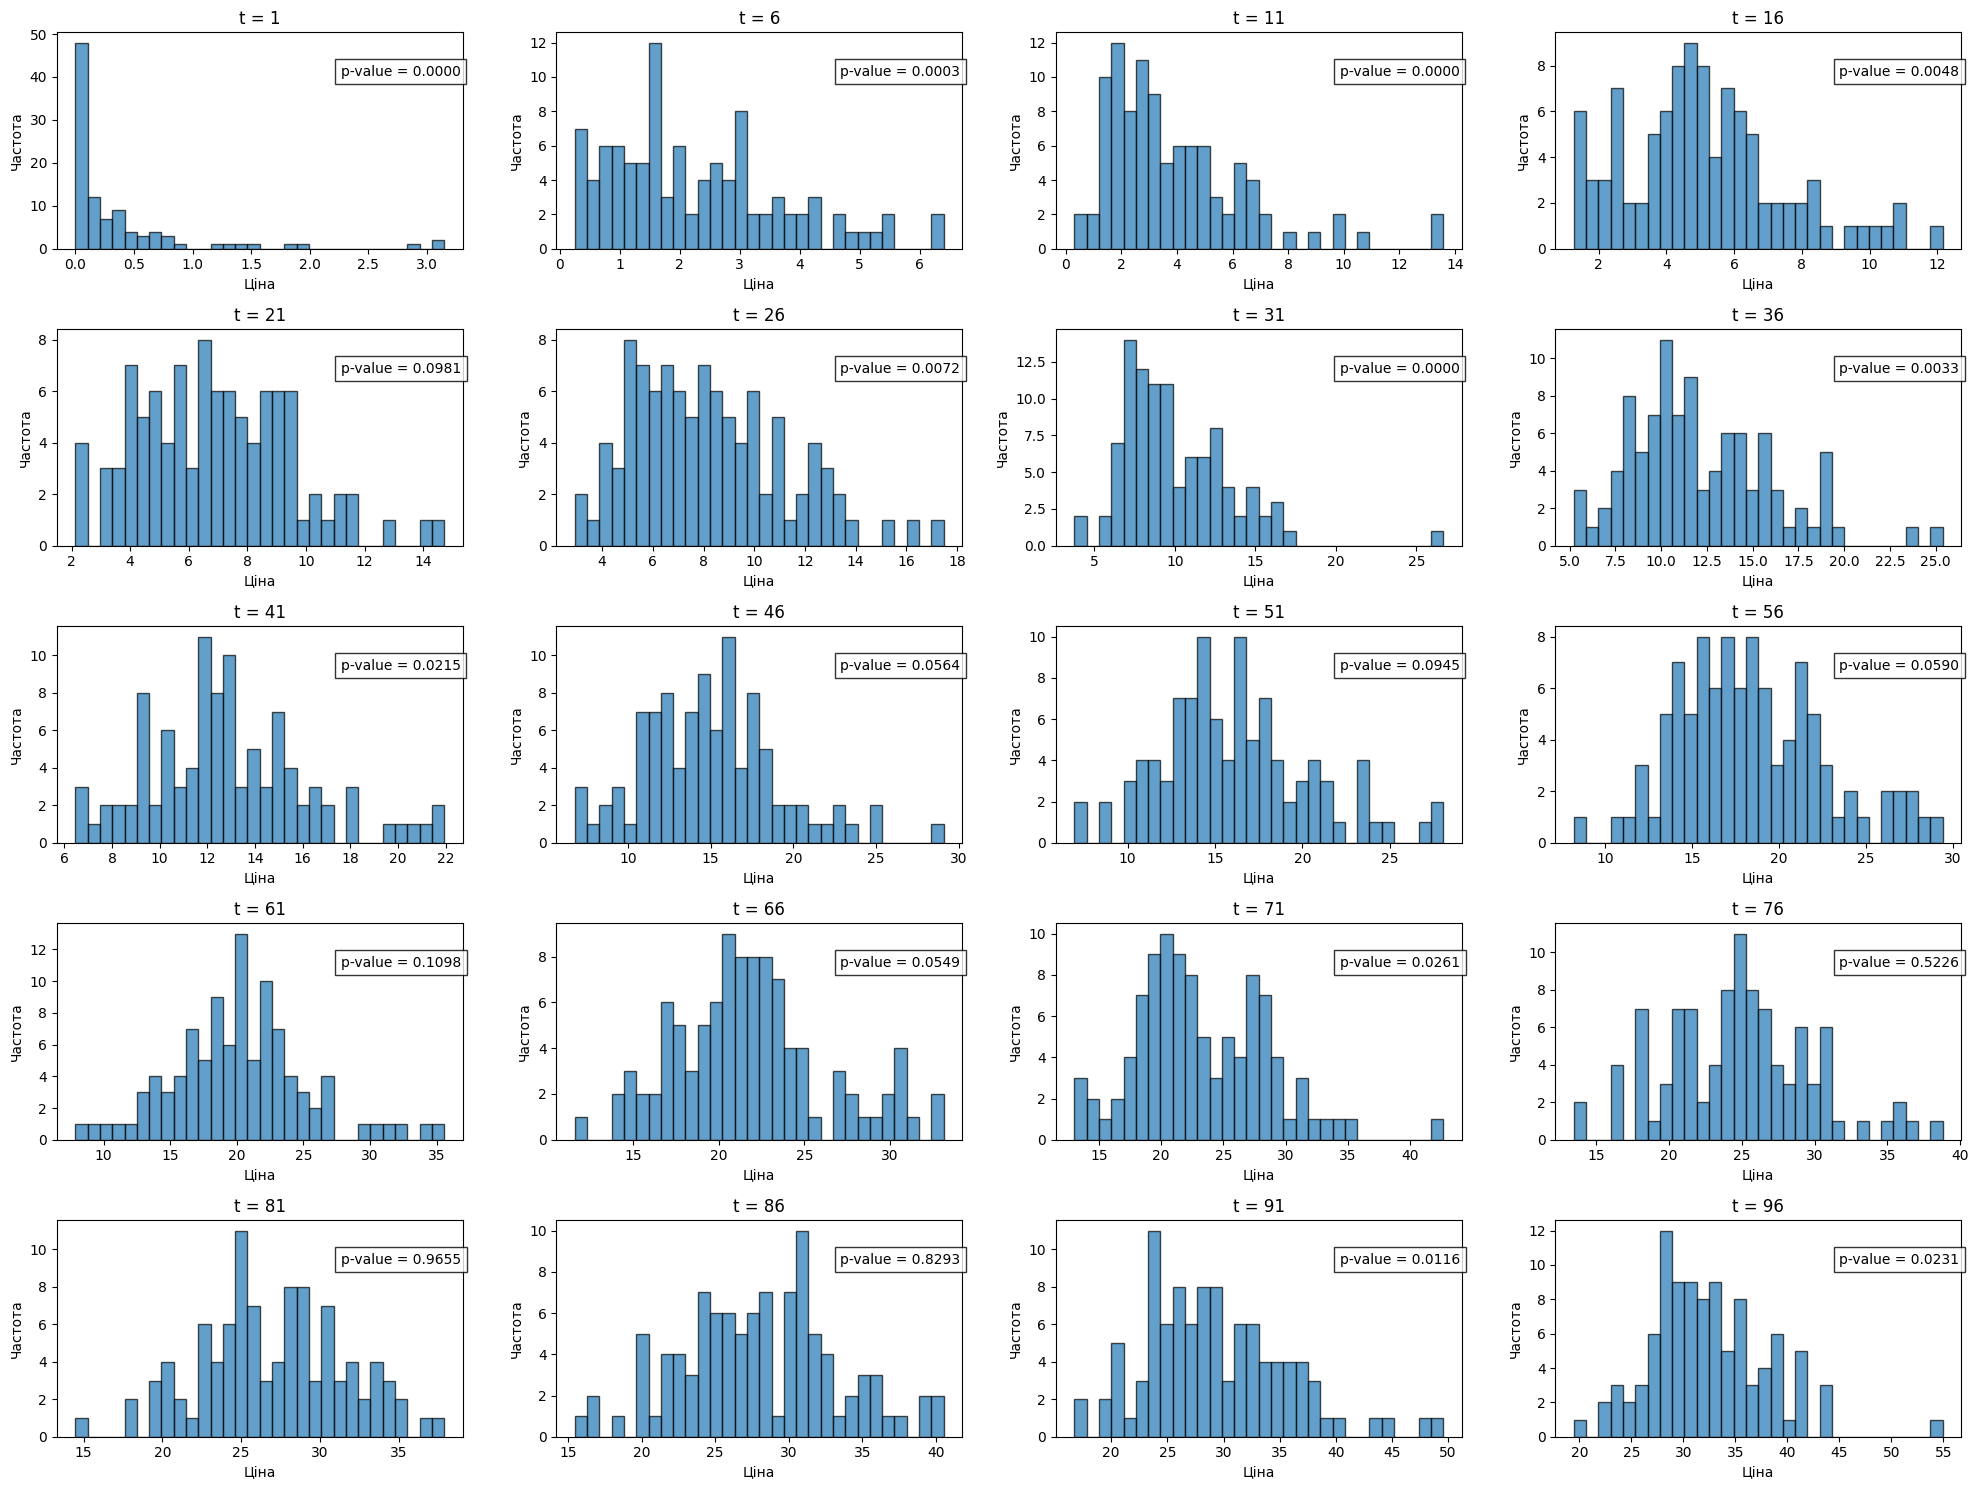

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma, shapiro

# Параметри гамма-розподілу
shape, scale = 0.3, 1.1  # Параметри форми і масштабу гамма-розподілу

# Генерація даних з гамма-розподілу
n_samples = 1000
x = gamma.rvs(shape, scale=scale, size=n_samples)

# а) Побудова гістограми для розподілу x
plt.figure(figsize=(10, 6))
plt.hist(x, bins=30, edgecolor='black', alpha=0.7)
plt.title(rf'Гістограма розподілу $x \sim \Gamma({shape}, {scale})$')
plt.xlabel('Значення x')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

# б) Симуляція зміни ціни акцій для різних значень часу t
# Збільшуємо кількість кроків t до 100 з кроком 5, щоб краще оцінити динаміку
time_steps = np.arange(1, 101, 5)
n_simulations = 100  # Кількість симуляцій для кожного t
final_prices = []

# Виконуємо симуляцію для кожного значення t та збираємо результати
for t in time_steps:
    prices = [gamma.rvs(shape, scale=scale, size=t).sum() for _ in range(n_simulations)]
    final_prices.append(prices)

# Налаштування відображення: 5 рядів по 4 графіки у кожному (всього 20 графіків)
fig, axs = plt.subplots(5, 4, figsize=(20, 15))
axs = axs.ravel()  # Перетворюємо масив осей в плоский список для зручного доступу

# Відображаємо результати на підграфіках
for i, (t, prices) in enumerate(zip(time_steps, final_prices)):
    axs[i].hist(prices, bins=30, edgecolor='black', alpha=0.7)
    axs[i].set_title(f't = {t}')
    axs[i].set_xlabel('Ціна')
    axs[i].set_ylabel('Частота')

    # Перевірка на нормальність (тест Шапіро-Вілка)
    stat, p_value = shapiro(prices)
    axs[i].text(0.7, 0.8, f'p-value = {p_value:.4f}', transform=axs[i].transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()  # Автоматично регулюємо макет для уникнення перекриття
plt.show()


### Пояснення

1. **Побудова гістограми для розподілу $x$:**
   
   - Використовуючи гамма-розподіл із заданими параметрами, ми генеруємо 1000 випадкових значень $x$. Гістограма відображає, як ці значення розподілені.

2. **Симуляція зміни ціни акцій для різних значень часу $t$:**
   
   - Ми виконуємо симуляції для значень часу $t$ від 1 до 100 із кроком 5. Кожна симуляція включає 100 повторень для кожного значення $t$. Зібрані результати дозволяють побудувати гістограми для кожного значення $t$, щоб оцінити, як розподіл змінюється з часом.
   
   - Тест Шапіро-Вілка використовується для перевірки нормальності розподілу. Цей тест є одним із стандартних способів оцінки того, наскільки даний розподіл схожий на нормальний.


### **Висновки**

- **Гістограма розподілу $x$:**

   Гамма-розподіл з параметрами $ \Gamma(0.3, 1.1) $ має асиметричну форму, що видно з гістограми.

- **Зміна розподілу зі збільшенням $ t $**:

   Зі збільшенням часу $ t $, розподіл суми змін ціни стає більш схожим на нормальний розподіл, що є наслідком центральної граничної теореми, яка стверджує, що сумарний розподіл великих незалежних випадкових величин (наприклад, зміна ціни в різні моменти часу) буде наближатися до нормального.


#### ***Додаткова* візуалізація**

Тривимірний графік поверхні, що відображає розподіл цін акцій у часі, створений на основі симуляцій з гамма-розподілом, полегшує розуміння змін у розподілі зі збільшенням часу $ t $ та візуальне виявлення закономірностей у даних.

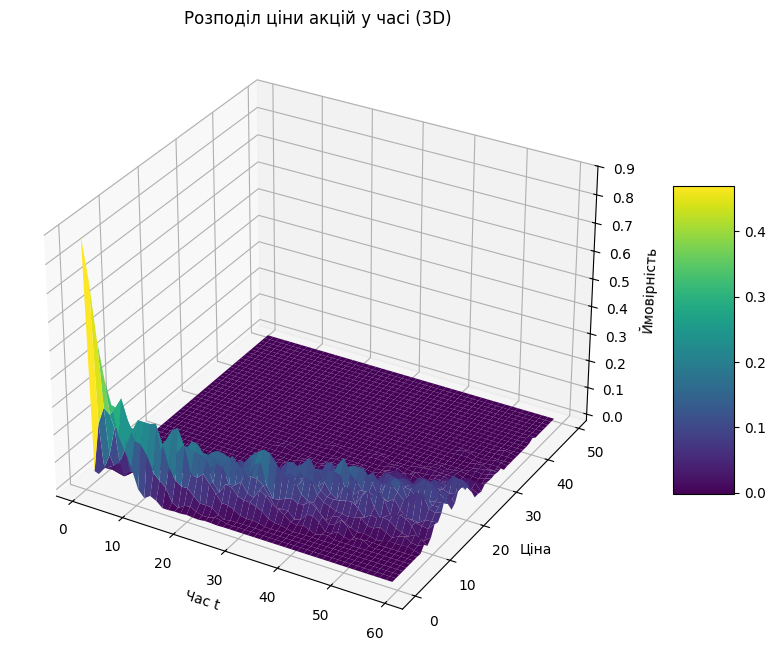

In [32]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata
from scipy.stats import gamma

# Параметри симуляції
shape, scale = 0.3, 1.1
time_steps = np.arange(1, 61, 2)
n_simulations = 100

# Підготовка даних для тривимірного графіка
price_grid = np.linspace(0, 50, 50)  # Діапазон цін розширено
Z = np.zeros((len(price_grid) - 1, len(time_steps)))

for i, t in enumerate(time_steps):
    prices = [gamma.rvs(shape, scale=scale, size=t).sum() for _ in range(n_simulations)]
    hist, _ = np.histogram(prices, bins=price_grid, density=True)
    Z[:, i] = hist

X, Y = np.meshgrid(time_steps, price_grid[:-1])

# Інтерполяція для створення плавної поверхні
X_smooth = np.linspace(X.min(), X.max(), 50)
Y_smooth = np.linspace(Y.min(), Y.max(), 50)
X_smooth, Y_smooth = np.meshgrid(X_smooth, Y_smooth)
Z_smooth = griddata(
    (X.flatten(), Y.flatten()), Z.flatten(), (X_smooth, Y_smooth), method="cubic"
)

# Побудова тривимірного графіка з можливістю обертання
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection="3d")
surf = ax.plot_surface(X_smooth, Y_smooth, Z_smooth, cmap="viridis", edgecolor="none")

# Налаштування графіка
ax.set_xlabel("Час t")
ax.set_ylabel("Ціна")
ax.set_zlabel("Ймовірність")
ax.set_title("Розподіл ціни акцій у часі (3D)")

# Додавання кольорової шкали
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

# Можливість обертання графіка
plt.show()


---

Перші кілька рядків даних:
       TV  Billboards  Google_Ads  Social_Media  Influencer_Marketing  \
0  281.42      538.80      123.94        349.30                242.77   
1  702.97      296.53      558.13        180.55                781.06   
2  313.14      295.94      642.96        505.71                438.91   
3  898.52       61.27      548.73        240.93                278.96   
4  766.52      550.72      651.91        666.33                396.33   

   Affiliate_Marketing  Product_Sold  
0               910.10        7164.0  
1               132.43        5055.0  
2               464.23        6154.0  
3               432.27        5480.0  
4               841.93        9669.0  

Статистичні показники:
                             mean      variance      std_dev
TV                     517.431000  8.301013e+04   288.114792
Billboards             502.644933  7.608901e+04   275.842369
Google_Ads             512.444133  8.146593e+04   285.422376
Social_Media           489.80010

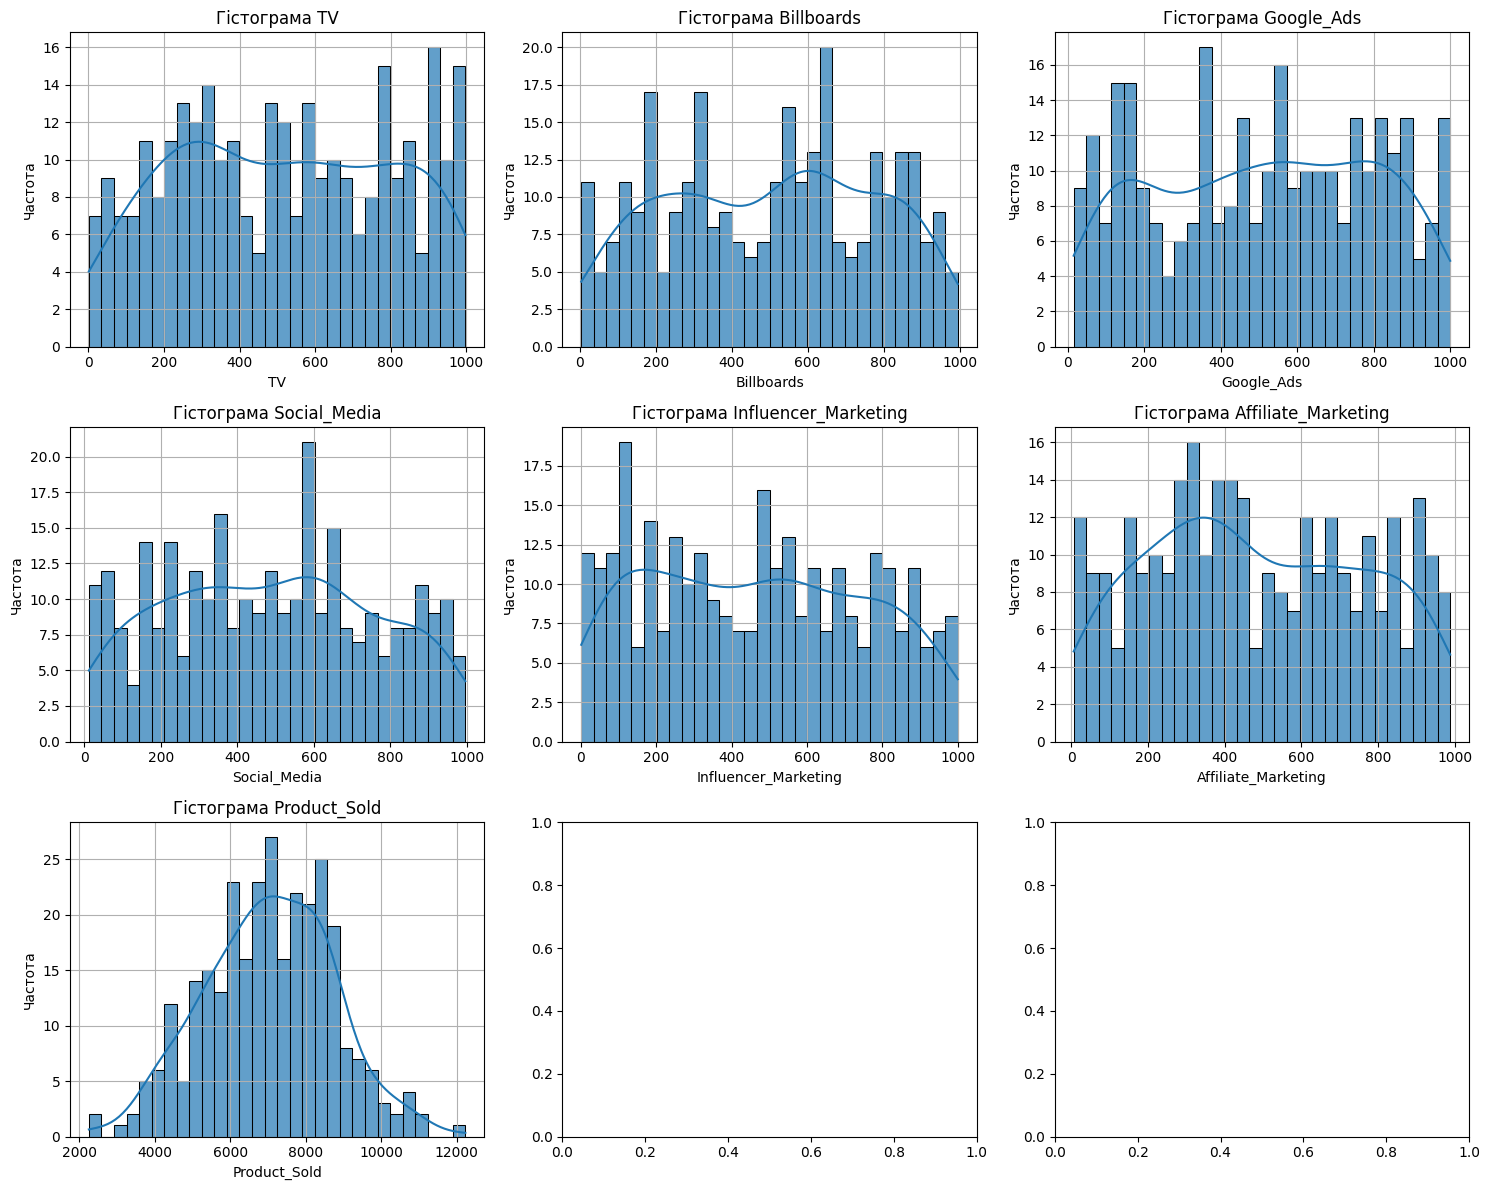


Перевірка на нормальність:
TV: p-value = 0.0000
TV розподіл відрізняється від нормального
Billboards: p-value = 0.0000
Billboards розподіл відрізняється від нормального
Google_Ads: p-value = 0.0000
Google_Ads розподіл відрізняється від нормального
Social_Media: p-value = 0.0000
Social_Media розподіл відрізняється від нормального
Influencer_Marketing: p-value = 0.0000
Influencer_Marketing розподіл відрізняється від нормального
Affiliate_Marketing: p-value = 0.0000
Affiliate_Marketing розподіл відрізняється від нормального
Product_Sold: p-value = 0.7863
Product_Sold розподіл не відрізняється від нормального

Кореляція з Product_Sold:
TV                      0.374228
Billboards              0.480593
Google_Ads              0.203678
Social_Media            0.401088
Influencer_Marketing    0.140844
Affiliate_Marketing     0.611603
Name: Product_Sold, dtype: float64


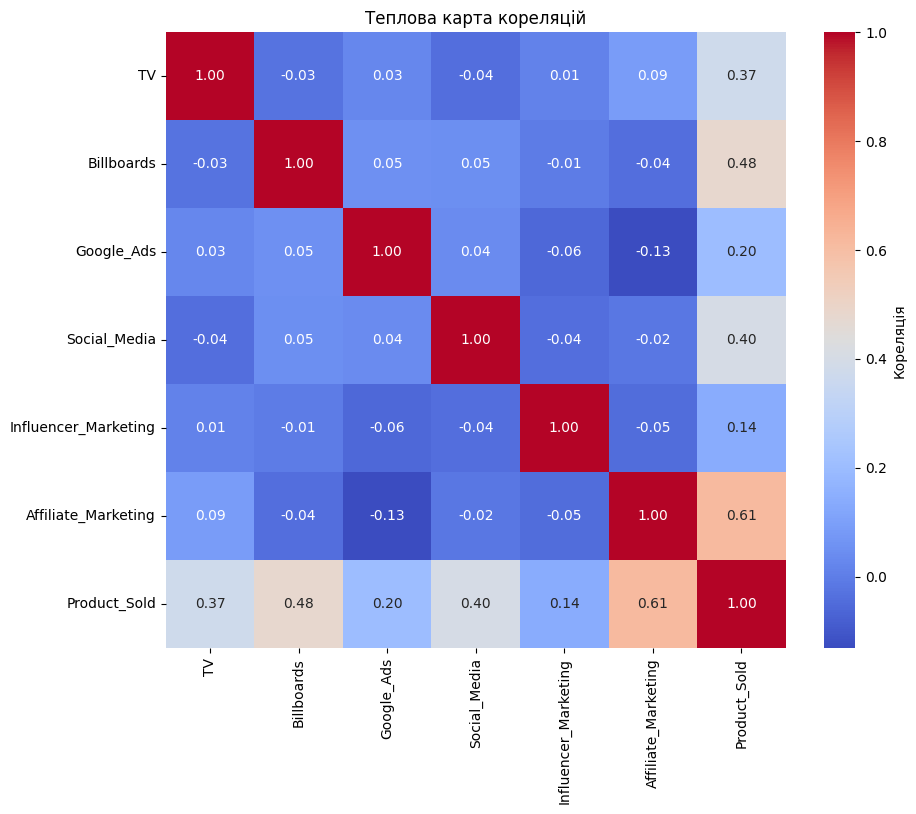

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import shapiro

# Завантаження даних
url = "https://docs.google.com/spreadsheets/d/18WCpPS96Tb3cB0FCsIA92PEhcmBkp08sjYhS9DsQfJE/edit#gid=954244094"
url = url[: url.find("/edit")] + "/export?format=csv"
df = pd.read_csv(url)

# Перевірка структури даних
print("Перші кілька рядків даних:")
print(df.head())

# Обчислення середнього значення, дисперсії та стандартного відхилення для кожної колонки
statistics = df.describe().T
statistics["variance"] = df.var()
statistics["std_dev"] = df.std()
print("\nСтатистичні показники:")
print(statistics[["mean", "variance", "std_dev"]])

# Побудова гістограм розподілу для кожного показника на підграфіках
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()

for i, column in enumerate(df.columns):
    sns.histplot(
        df[column], bins=30, kde=True, edgecolor="black", alpha=0.7, ax=axes[i]
    )
    axes[i].set_title(f"Гістограма {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Частота")
    axes[i].grid(True)

plt.tight_layout()
plt.show()

# Перевірка на нормальність розподілу
print("\nПеревірка на нормальність:")
for column in df.columns:
    stat, p_value = shapiro(df[column])
    print(f"{column}: p-value = {p_value:.4f}")
    if p_value > 0.05:
        print(f"{column} розподіл не відрізняється від нормального")
    else:
        print(f"{column} розподіл відрізняється від нормального")

# Обчислення кореляції з Product_Sold
correlations = df.corr()["Product_Sold"].drop("Product_Sold")
print("\nКореляція з Product_Sold:")
print(correlations)

# Теплова карта кореляцій
plt.figure(figsize=(10, 8))
sns.heatmap(
    df.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={"label": "Кореляція"}
)
plt.title("Теплова карта кореляцій")
plt.show()
